# Distributed SEB/SMB

In [1]:
%pylab inline
import os
import pandas as pd
import seaborn as sns
import downglacier.sandbox.tcd_utils as utils
import downglacier as dg
import downglacier.main as dgmain
import downglacier.graphics
sns.set_context("talk", font_scale=1.2)
sns.set_style("ticks")

Populating the interactive namespace from numpy and matplotlib


In [2]:
wd = utils.run_standard_allz(run=False)
odir = os.path.join(wd, 'output')

## OK. Results

In [3]:
df = pd.concat([pd.read_csv(os.path.join(odir, 'screening', 'results.csv'), index_col=0), 
                pd.read_csv(os.path.join(odir, 'diagnostics', 'results.csv'), index_col=0)])

In [4]:
vt = []
alt = []
for i in df.index:
    i = i.split('_')
    alt.append(i[1])
    vt.append(i[2])
df.insert(1, 'z', alt)
df.insert(2, 'type', vt)

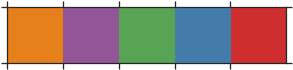

In [5]:
pal = sns.color_palette('Set1', n_colors=5, desat=0.8)[::-1]
sns.palplot(pal)
sns.set_palette(pal)

In [6]:
df_sigma = pd.DataFrame()
df_ss = pd.DataFrame()
vns = ['swnetsum', 'lwnetsum', 'prcpsolclip', 'mbtotfromcfsum', 'mbtotfromsum']
labels = [u'$SW_{Net}$', u'$LW_{Net}$', u'$PRCP_{S}$', u'$MB_{Cor}$', u'$MB$']
styles = ['--', '--', '--', '-', '-']
thicks = [1, 1, 1, 2, 2]
for vn, l in zip(vns, labels):
    dft = df[df['varname'] == vn].set_index('z')
    df_sigma[l] = dft['outercv_percsigma']
    df_ss[l] = dft['outercv_skillscore']

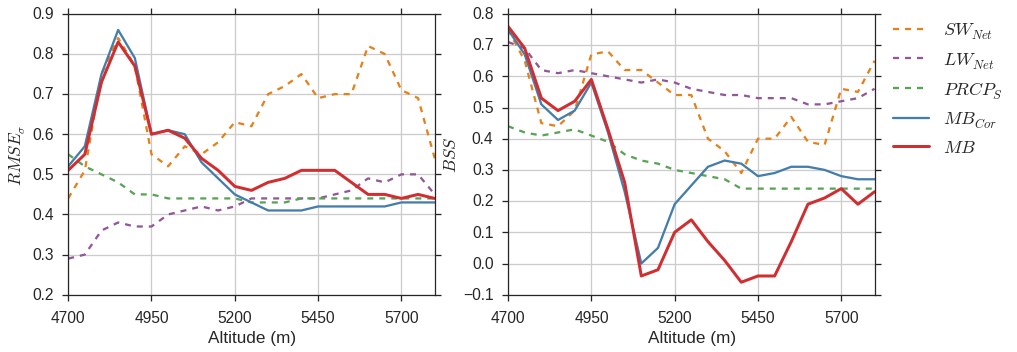

In [7]:
fig = plt.figure(figsize=(14, 5), dpi=200)
ax = fig.add_subplot(121)

df_sigma.plot(ax=ax, legend=False, style=styles)
l = ax.get_lines()
setp(l[-1], linewidth=3) 
ax.set_ylabel(u'$RMSE_{\sigma}$')
ax.set_xlabel('Altitude (m)')

ax = fig.add_subplot(122)
df_ss.plot(ax=ax, style=styles)
l = ax.get_lines()
setp(l[-1], linewidth=3) 
ax.set_ylabel(u'$BSS$')
ax.set_xlabel('Altitude (m)')

plt.subplots_adjust(left=0.07, right=0.87, top=0.94, bottom=0.16)
plt.legend(bbox_to_anchor=(1.03, 1.), fontsize=18, loc=2, borderaxespad=0, frameon=False);
plt.savefig(os.path.join(utils.get_plot_dir(), 'Fig_09.pdf'))

## Timeseries

In [8]:
pal = sns.color_palette('deep')
import pickle
with open(os.path.join(odir, 'diagnostics', 'results.p'), 'rb') as f:
    vc = pickle.load(f)

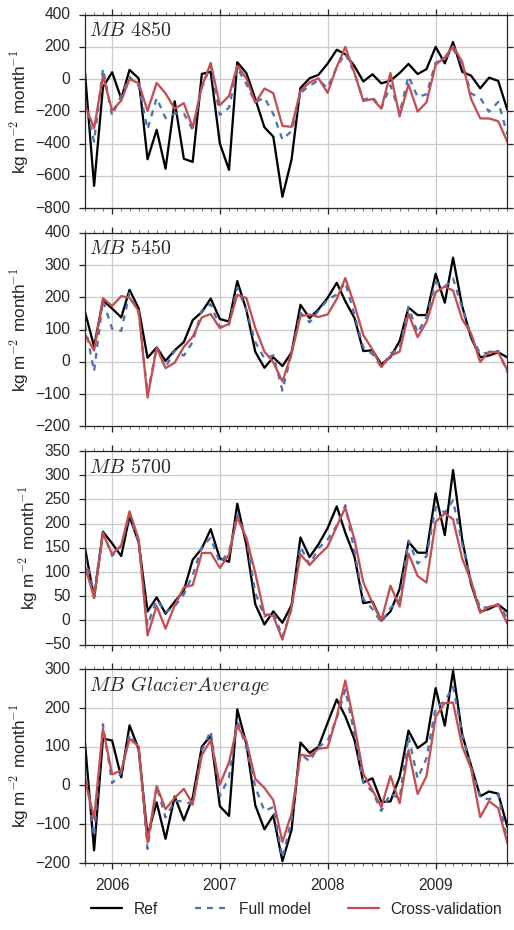

In [9]:
vns = ['mbtotfromsum', 'mbtotfromsum', 'mbtotfromsum', 'mbspecfromsum']
titles = [u'$MB\, 4850$', u'$MB\, 5450$', u'$MB\, 5700$', u'$MB\, Glacier Average$']
alti = [4850, 5450, 5700, 0]

fig = plt.figure(figsize=(9*0.8, 16*0.8), dpi=200)
for i, (alt, vn) in enumerate(zip(alti, vns)):
    
    ax = fig.add_subplot(4,1,i+1)
    v = vc.getvar(vn, alt, isdiag=True)
    
    data = v.ref_ts.values
    fm = v.fullmodel_ts.values
    cv = v.outercv_ts.values
    if i < 3:
        unit = v.units   
    
    data = data 
    fm = fm 
    cv = cv 
    
    plt.plot(v.ref_ts.index, data, color='k', label='Ref')
    plt.plot(v.ref_ts.index, fm, color=pal[0], linestyle='--', label='Full model')
    plt.plot(v.ref_ts.index, cv, color=pal[2], label='Cross-validation')
    plt.grid()
    text(0.01, 0.89, titles[i], transform=ax.transAxes, fontsize=20)
    
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(MonthLocator())
    
    if i < 3:
        un = downglacier.graphics.__parseunit(unit)
    ax.set_ylabel(un)
    if i < 3: 
        ax.set_xticklabels('')

plt.legend(bbox_to_anchor=(0., -0.27, 1., .102),
           ncol=3, borderaxespad=0., mode="expand");
plt.tight_layout()
plt.subplots_adjust(bottom=0.06)
plt.savefig(os.path.join(utils.get_plot_dir(), 'Fig_10.pdf'))